# A Deep Learning Approach for Intent Classification


#### Connecting Google Drive to the Google Colab:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/virtual assistants course/final project/')

## step one: Loading CLINIC150 Dataset

In [4]:
import json
with open('data_oos_plus.json') as f:
    data = json.load(f)

In [5]:
x_train = []
y_train = []

for i in range(len(data['train'])):
    x_train.append(data['train'][i][0])
    y_train.append(data['train'][i][1])

#appending out of scope class to the rest of the trainset:    
for i in range(len(data['oos_train'])):
    x_train.append(data['oos_train'][i][0])
    y_train.append(data['oos_train'][i][1])

x_val = []
y_val = []

for i in range(len(data['val'])):
    x_val.append(data['val'][i][0])
    y_val.append(data['val'][i][1])
    
for i in range(len(data['oos_val'])):
    x_val.append(data['oos_val'][i][0])
    y_val.append(data['oos_val'][i][1])

x_test = []
y_test = []

for i in range(len(data['test'])):
    x_test.append(data['test'][i][0])
    y_test.append(data['test'][i][1])  
    
for i in range(len(data['oos_test'])):
    x_test.append(data['oos_test'][i][0])
    y_test.append(data['oos_test'][i][1])

#### List of Clinic150 class labels:

In [6]:
for i in set(y_train):
    print(i, end =", ")

change_volume, redeem_rewards, timezone, credit_score, damaged_card, goodbye, international_fees, expiration_date, exchange_rate, pin_change, what_are_your_hobbies, what_can_i_ask_you, greeting, international_visa, calories, vaccines, maybe, roll_dice, todo_list, book_hotel, alarm, where_are_you_from, cancel_reservation, accept_reservations, date, what_is_your_name, freeze_account, tell_joke, who_made_you, account_blocked, car_rental, flip_coin, change_speed, text, balance, make_call, calendar_update, bill_due, restaurant_suggestion, time, rewards_balance, confirm_reservation, how_old_are_you, reminder_update, report_lost_card, tire_pressure, calendar, directions, shopping_list, apr, insurance, flight_status, ingredients_list, book_flight, pto_request, cook_time, plug_type, travel_alert, jump_start, order_checks, timer, lost_luggage, pto_used, new_card, change_ai_name, application_status, whisper_mode, travel_notification, translate, todo_list_update, meeting_schedule, rollover_401k, c

#### transforming data into numpy:

In [7]:
import numpy as np

x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

x_val_np = np.array(x_val)
y_val_np = np.array(y_val)

x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

### Choosing 10 classes:

#### Class 1: translate
#### Class 2: restaurant_reservation
#### Class 3: restaurant_reviews
#### Class 4: flight_status
#### Class 5: play_music
#### Class 6: make_call
#### Class 7: current_location
#### Class 8: text (sending a text message)
#### Class 9: traffic
#### Class 10: oos (out of scope)

In [8]:
labels = ['translate',
         'restaurant_reservation',
         'restaurant_reviews',
         'flight_status',
         'play_music',
         'make_call',
         'current_location',
         'text',
         'traffic',
         'oos',]

In [9]:
#_10 is for selecting only 10 classes
x_train_10 = np.array([])
y_train_10 = np.array([])

x_val_10 = np.array([])
y_val_10 = np.array([])

x_test_10 = np.array([])
y_test_10 = np.array([])

for label in labels:
    x_train_10 = np.append(x_train_10, 
    x_train_np[y_train_np==label])
    y_train_10 = np.append(y_train_10, 
    y_train_np[y_train_np==label])
    
    x_val_10 = np.append(x_val_10, 
    x_val_np[y_val_np==label])
    y_val_10 = np.append(y_val_10, 
    y_val_np[y_val_np==label])
    
    x_test_10 = np.append(x_test_10, 
    x_test_np[y_test_np==label])
    y_test_10 = np.append(y_test_10, 
    y_test_np[y_test_np==label])

In [10]:
print(x_train_10[133])
print(y_train_10[133])

book a reservation for 3 at red lobster under the name steve
restaurant_reservation


## step two: Transforming CLINIC150 labels into onehot 

In [11]:
def one_hot_creator_10_classes(categorical_data, ten_labels):
    one_hot = []
    for i in categorical_data:
        pos = -1
        for j in ten_labels:
            pos+=1
            if i == j: 
                one_hot.append([int(0==pos),int(1==pos),int(2==pos),int(3==pos),
                                int(4==pos),int(5==pos),int(6==pos),int(7==pos),
                                int(8==pos),int(9==pos)])
                break
    return one_hot

y_train_10_onehot = np.array( one_hot_creator_10_classes(y_train_10, labels) )
y_val_10_onehot = np.array( one_hot_creator_10_classes(y_val_10, labels) )
y_test_10_onehot = np.array( one_hot_creator_10_classes(y_test_10, labels) )

In [12]:
#testing:
y_test_10_onehot[500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## step three: Importing a pre-trained word embedding model

In [3]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=74a296c88b0f3b21d2129f05ac7af521b5c74ca3d84891da01e242098f937612
  Stored in directory: /tmp/pip-ephem-wheel-cache-p0h9kty8/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

## step four: Developing the baseline model

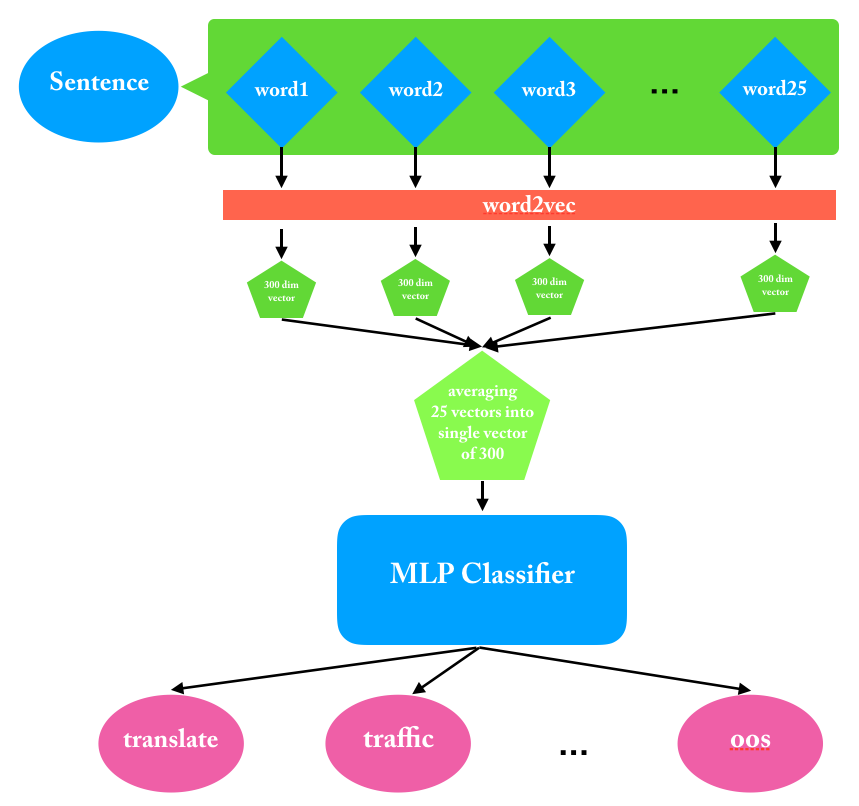

### Data preprocessing
#### transforming each sample of x_train, x_test, and x_val to a 300 dimentional vector using *word2vec*:

##### When calling nlp(<sentence>).vector, it calculates the vector of each word in the given sentence and then averages them all to output a single vector representing the whole sentence:

In [13]:
x_train_10_vec = []
for i in x_train_10:
    x_train_10_vec.append(nlp(str(i)).vector)
x_train_10_vec = np.array(x_train_10_vec)

x_val_10_vec = []
for i in x_val_10:
    x_val_10_vec.append(nlp(str(i)).vector)
x_val_10_vec = np.array(x_val_10_vec)

x_test_10_vec = []
for i in x_test_10:
    x_test_10_vec.append(nlp(str(i)).vector)
x_test_10_vec = np.array(x_test_10_vec)

#### Building and training a simple perceptron model consisting only two layers:



In [14]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
import keras

model = Sequential()
model.add(Dense(10, input_dim=300, activation='softmax')) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x=x_train_10_vec,
          y=y_train_10_onehot,
          validation_data=(x_val_10_vec, y_val_10_onehot),
          epochs=30,
          batch_size=64,
          verbose=0)
results = model.evaluate(x_test_10_vec, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                3010      
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.8709
test accuracy:  87.0 %


#### Building and training a more complex MLP model:


In [15]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
import keras

model = Sequential()
model.add(Dense(50, input_dim=300, activation=LeakyReLU())) 
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x=x_train_10_vec,
          y=y_train_10_onehot,
          validation_data=(x_val_10_vec, y_val_10_onehot),
          epochs=30,
          batch_size=64,
          verbose=0)
results = model.evaluate(x_test_10_vec, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 15,560
Trainable params: 15,560
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8906
test accuracy:  89.0 %


#### Building and training a more complex MLP model:

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
import keras

model = Sequential()
model.add(Dense(300, input_dim=300, activation=LeakyReLU())) 
model.add(Dropout(rate = 0.5))
model.add(Dense(300, activation=LeakyReLU())) 
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x=x_train_10_vec,
          y=y_train_10_onehot,
          validation_data=(x_val_10_vec, y_val_10_onehot),
          epochs=30,
          batch_size=64, 
          verbose=0)
results = model.evaluate(x_test_10_vec, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 183,610
Trainable params: 183,610
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.8646
test accuracy:  86.4 %


## step five: Developing a neural network model based on GRU

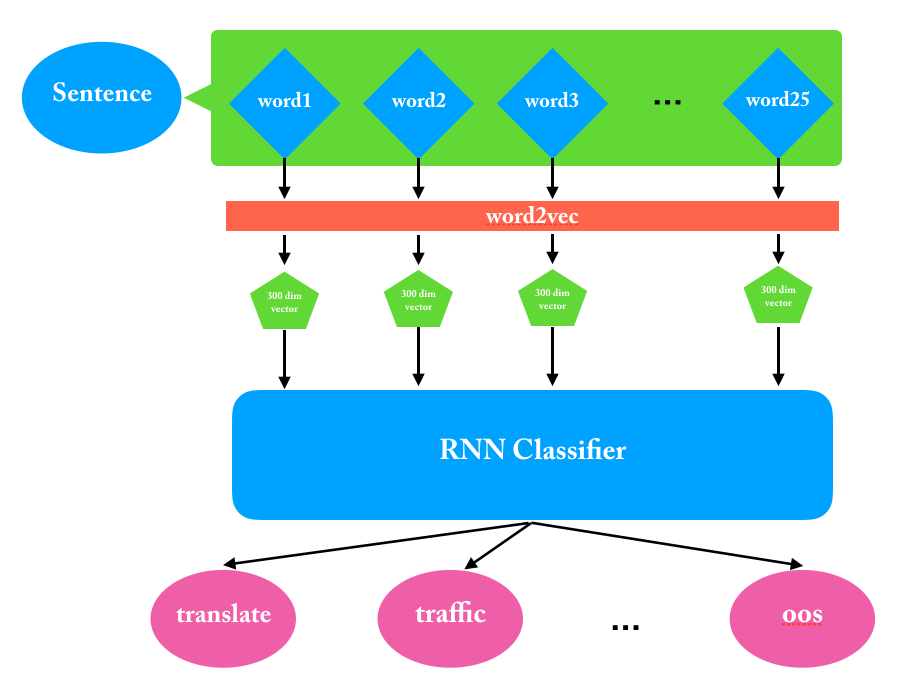

#### Preprocessing the dataset
#### Each word of each sample will be transformed into a vector of 300 elements:

##### Finding the length of the longest sentence:

In [17]:
max_ = -1
for i in x_train_10:
    count = len(i.split())
    if count>max_: max_ = count
for i in x_val_10:
    count = len(i.split())
    if count>max_: max_ = count
for i in x_test_10:
    count = len(i.split())
    if count>max_: max_ = count
max_
    

25

##### transforming each sentence to a vector of 25 elements, each element containing 300 features. Those sentences with words less than 25 words, will have a set of 300 dimentional zero vectors instead of each missing word:

In [18]:
def sentence_to_25_vector(sentence):
    result = []
    for word in sentence.split(' '):
        result.append(nlp(word).vector)
    word_count = len(result)
    if word_count < 25:
        for i in range(25 - word_count):
            result.append(nlp('').vector) #generating a vector of 300 zeros
    return np.array(result)

def dataset_to_25_vector(dataset):
    result = []
    for sample in dataset:
        result.append( sentence_to_25_vector(sample) )
    return np.array(result)

In [19]:
x_test_10_rnn = dataset_to_25_vector(x_test_10)
x_train_10_rnn = dataset_to_25_vector(x_train_10)
x_val_10_rnn = dataset_to_25_vector(x_val_10)

In [20]:
#testing:
x_val_10_rnn.shape

(280, 25, 300)

##### Creating the model:

In [21]:
from keras.models import Sequential
from keras.layers import GRU, Dense

modelGRU = Sequential()
modelGRU.add(GRU(4, input_shape=(25, 300)))
modelGRU.add(Dense(10, activation='softmax') )
modelGRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelGRU.summary()
modelGRU.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelGRU.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 4)                 3672      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                50        
Total params: 3,722
Trainable params: 3,722
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 5ms/step - loss: 1.5041 - accuracy: 0.6449
test accuracy:  64.4 %


##### Creating a more complex model:

In [22]:
from keras.models import Sequential
from keras.layers import GRU, Dense

modelGRU = Sequential()
modelGRU.add(GRU(40, input_shape=(25, 300), activation='tanh', dropout=0.25))
modelGRU.add(Dense(10, activation='softmax') )
modelGRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelGRU.summary()
modelGRU.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelGRU.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 40)                41040     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                410       
Total params: 41,450
Trainable params: 41,450
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 5ms/step - loss: 1.3394 - accuracy: 0.8472
test accuracy:  84.7 %


## step six: Developing a neural network model based on LSTM

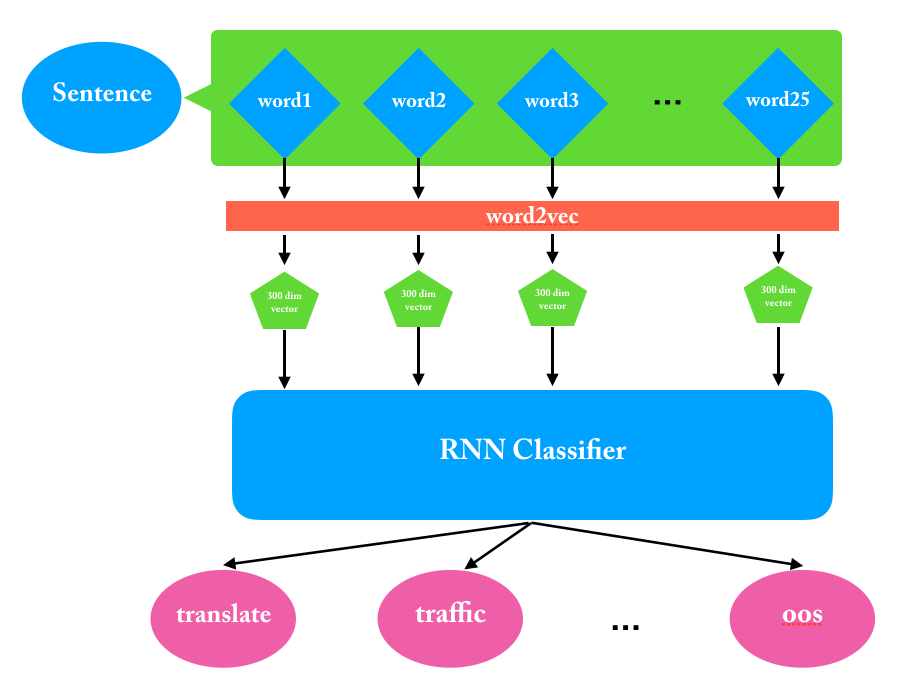

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU

modelLSTM = Sequential()
modelLSTM.add(LSTM(40, input_shape=(25, 300),
                 dropout=0.5,
                 return_sequences=True))
modelLSTM.add(LSTM(40, dropout=0.5))
modelLSTM.add(Dense(10, activation='softmax') )
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelLSTM.summary()
modelLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 40)            54560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 67,930
Trainable params: 67,930
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 7ms/step - loss: 0.4241 - accuracy: 0.9244
test accuracy:  92.4 %


#### Developing a more complex model:

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU

modelLSTM = Sequential()
modelLSTM.add(LSTM(40, input_shape=(25, 300),
                 dropout=0.5, 
                 return_sequences=True))
modelLSTM.add(LSTM(40, dropout=0.5,  return_sequences=True))
modelLSTM.add(LSTM(40, dropout=0.5))
modelLSTM.add(Dense(10, activation='softmax') )
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelLSTM.summary()
modelLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 25, 40)            54560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 40)            12960     
_________________________________________________________________
lstm_4 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                410       
Total params: 80,890
Trainable params: 80,890
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 10ms/step - loss: 0.8821 - accuracy: 0.8417
test accuracy:  84.1 %


#### Developing a more complex model:

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU

modelLSTM = Sequential()
modelLSTM.add(LSTM(800, input_shape=(25, 300),dropout=0.6, return_sequences=True))
modelLSTM.add(LSTM(800,dropout=0.6))
modelLSTM.add(Dense(10, activation='softmax') )
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelLSTM.summary()
modelLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 25, 800)           3523200   
_________________________________________________________________
lstm_6 (LSTM)                (None, 800)               5123200   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                8010      
Total params: 8,654,410
Trainable params: 8,654,410
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 1s 31ms/step - loss: 0.4234 - accuracy: 0.9134
test accuracy:  91.3 %


#### Developing a deeper model (three hidden layers):

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU

modelLSTM = Sequential()
modelLSTM.add(LSTM(100, input_shape=(25, 300),dropout=0.5, return_sequences=True))
modelLSTM.add(LSTM(100,dropout=0.5, return_sequences=True))
modelLSTM.add(LSTM(100,dropout=0.5))
modelLSTM.add(Dense(10, activation='softmax') )
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelLSTM.summary()
modelLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 25, 100)           160400    
_________________________________________________________________
lstm_8 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 322,210
Trainable params: 322,210
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 11ms/step - loss: 1.0482 - accuracy: 0.8150
test accuracy:  81.4 %


#### Developing different model: (best results, yet)
#### Name: LSTM22

---

**** best ****

---



In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, TimeDistributed, Reshape

LSTM22 = Sequential()
LSTM22.add(LSTM(600, input_shape=(25, 300), return_sequences=True))
LSTM22.add(TimeDistributed(Dense(10, activation=LeakyReLU())))
LSTM22.add(Dropout(rate=0.5))
LSTM22.add(Reshape((250,)))
LSTM22.add(Dense(10, activation='softmax'))
LSTM22.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LSTM22.summary()
LSTM22.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=20,
          batch_size=64,
          verbose=0)
results = LSTM22.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 25, 600)           2162400   
_________________________________________________________________
time_distributed (TimeDistri (None, 25, 10)            6010      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 10)            0         
_________________________________________________________________
reshape (Reshape)            (None, 250)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2510      
Total params: 2,170,920
Trainable params: 2,170,920
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 1s 12ms/step - loss: 0.6109 - accuracy: 0.9039
test accuracy:  90.3 %

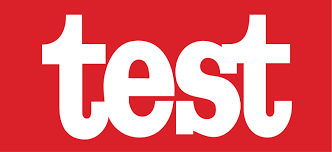

In [28]:
for i, val in enumerate((LSTM22.predict( sentence_to_25_vector('Text Bob I am going to be late').reshape(1,25,300))).tolist()[0]):
  print('intent-> {:22}'.format(labels[i]), '  probability: ', int(val*10000)/100)

intent-> translate                probability:  0.0
intent-> restaurant_reservation   probability:  0.0
intent-> restaurant_reviews       probability:  0.0
intent-> flight_status            probability:  0.0
intent-> play_music               probability:  0.0
intent-> make_call                probability:  0.0
intent-> current_location         probability:  0.0
intent-> text                     probability:  99.99
intent-> traffic                  probability:  0.0
intent-> oos                      probability:  0.0


## step seven: Developing a neural network model with biLSTM

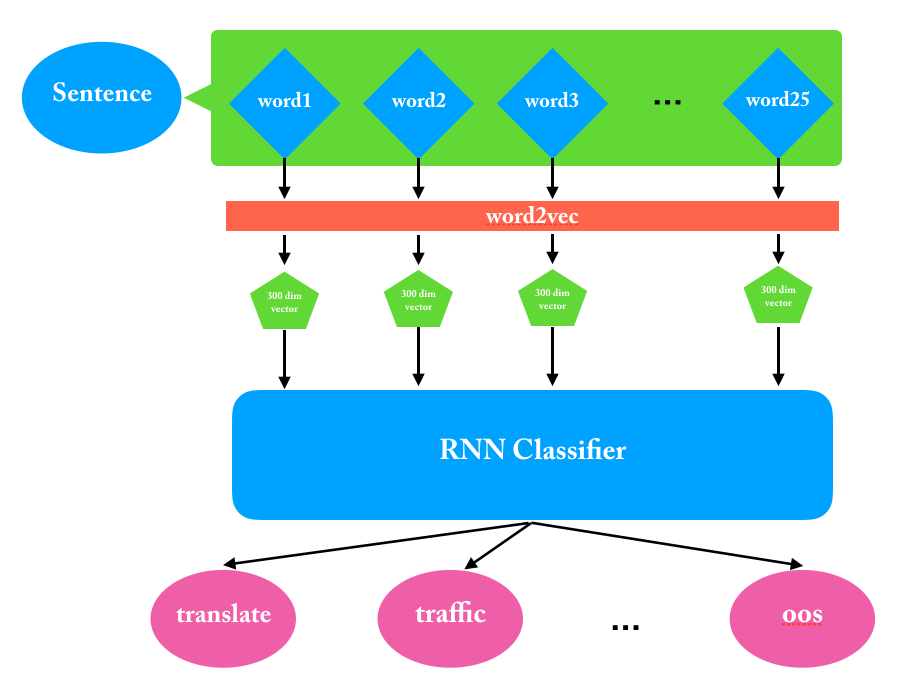

In [29]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM, Dense, TimeDistributed

modelBiLSTM = Sequential()
modelBiLSTM.add(Bidirectional(LSTM(40, input_shape=(25, 300))))
modelBiLSTM.add(Dense(10, activation='softmax') )
modelBiLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelBiLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelBiLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

40/40 [==============================] - 0s 7ms/step - loss: 0.5678 - accuracy: 0.8685
test accuracy:  86.8 %


#### Developing a more complex model:




In [30]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM, Dense, TimeDistributed

modelBiLSTM = Sequential()
modelBiLSTM.add(Bidirectional(LSTM(100, dropout=0.3, input_shape=(25, 300))))
modelBiLSTM.add(Dense(10, activation='softmax') )
modelBiLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelBiLSTM.fit(x=x_train_10_rnn,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn, y_val_10_onehot),
          epochs=100,
          batch_size=64,
          verbose=0)
results = modelBiLSTM.evaluate(x_test_10_rnn, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

40/40 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.8780
test accuracy:  87.7 %


## step eight: choosing the model with the best results and fine-tuning it

#### Extracting Named-entities from the setences and input them along side the words embeddings to a LSTM model:

In [31]:
#testing:
nlp('happy new year').ents[0].label - 379

12

In [32]:
def int_(bool, ner_intensity=1):
  if (bool): return ner_intensity
  return 0

#20 classes of named entities:
def one_hot_creator_20_classes(position,ner_intensity):
    ni = ner_intensity
    j = position
    one_hot = [int_(0==j,ni),int_(1==j,ni),int_(2==j,ni),int_(3==j,ni),
                                int_(4==j,ni),int_(5==j,ni),int_(6==j,ni),int_(7==j,ni),
                                int_(8==j,ni),int_(9==j,ni),
                                int_(10==j,ni),int_(11==j,ni),int_(12==j,ni),int_(13==j,ni),
                                int_(14==j,ni),int_(15==j,ni),int_(16==j,ni),int_(17==j,ni),
                                int_(18==j,ni),int_(19==j,ni)]
    return one_hot

def ner_label(word,ner_intensity):
  if (not nlp(word).ents):
    return list(np.zeros(20).astype(np.int))
  label = nlp(word).ents[0].label - 379
  return one_hot_creator_20_classes(label,ner_intensity)
  

In [33]:
#testing:
ner_label('Eifel',1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

##### seperating words in groups of three for NER detection:

In [34]:
my_sentence = 'Hello How are you tody?'.split(' ')

for word_index in range(len(my_sentence)):
  print(my_sentence[word_index:word_index+3])
  print(ner_label(' '.join(my_sentence[word_index:word_index+3]),1))


['Hello', 'How', 'are']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['How', 'are', 'you']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['are', 'you', 'tody?']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
['you', 'tody?']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
['tody?']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [35]:
def sentence_to_25_vector_ner(sentence, ner_intensity):
    result = []
    my_sentence = sentence.split(' ')
    for word_index in range(len(my_sentence)):
        result.append(np.array(list(nlp(my_sentence[word_index]).vector) + ner_label(' '.join(my_sentence[word_index:word_index+3]) , ner_intensity) ))
    word_count = len(result)
    if word_count < 25:
        for i in range(25 - word_count):
            result.append(np.zeros(320)) #generating a vector of 300 zeros
    return np.array(result)

def dataset_to_25_vector_ner(dataset,ner_intensity):
    result = []
    for sample in dataset:
        result.append( sentence_to_25_vector_ner(sample, ner_intensity) )
    return np.array(result)

x_test_10_rnn_ner1 = dataset_to_25_vector_ner(x_test_10,1)
x_train_10_rnn_ner1 = dataset_to_25_vector_ner(x_train_10,1)
x_val_10_rnn_ner1 = dataset_to_25_vector_ner(x_val_10,1)


In [36]:
#testing:
x_test_10_rnn_ner1.shape

(1270, 25, 320)

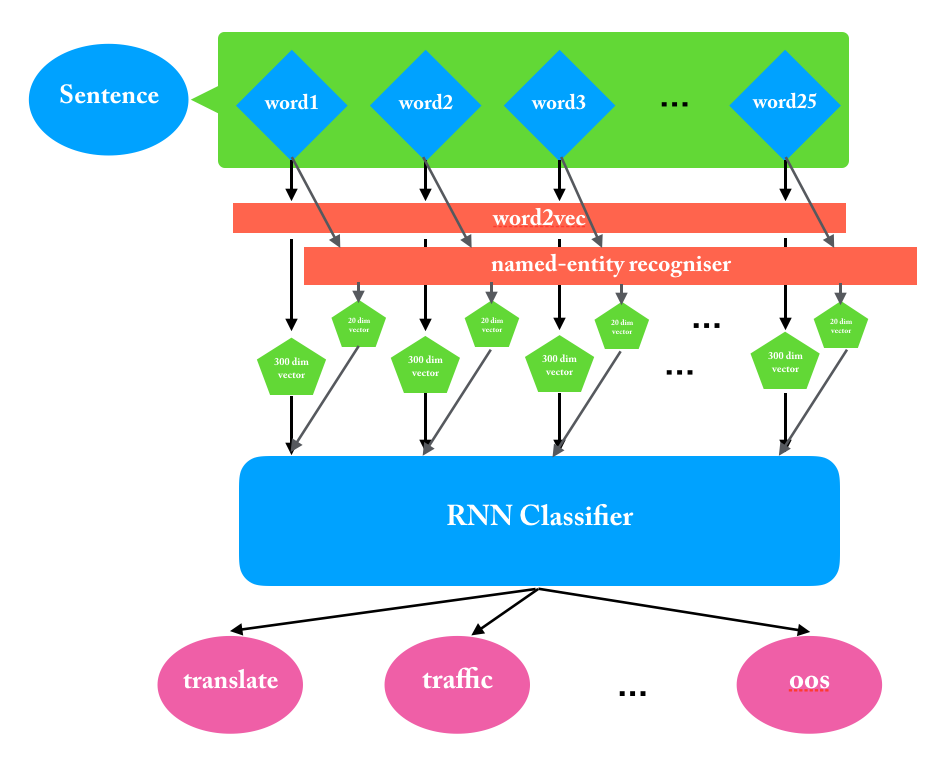

### Testing LSTM22 model, input , per word, is:


*   300 features from word2vec
*   20 onehot features from Named entities

So input shape is 25 word times 320



In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, TimeDistributed, Reshape

modelLSTM = Sequential()
modelLSTM.add(LSTM(600, input_shape=(25, 320), return_sequences=True))
modelLSTM.add(TimeDistributed(Dense(10, activation=LeakyReLU())))
modelLSTM.add(Dropout(rate=0.5))
modelLSTM.add(Reshape((250,)))
modelLSTM.add(Dense(10, activation='softmax'))
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelLSTM.summary()
modelLSTM.fit(x=x_train_10_rnn_ner1,
          y=y_train_10_onehot,
          validation_data=(x_val_10_rnn_ner1, y_val_10_onehot),
          epochs=20,
          batch_size=64,
          verbose = 0)
results = modelLSTM.evaluate(x_test_10_rnn_ner1, y_test_10_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 25, 600)           2210400   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 10)            6010      
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 10)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 250)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2510      
Total params: 2,218,920
Trainable params: 2,218,920
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 1s 12ms/step - loss: 0.8692 - accuracy: 0.8787
test accuracy:  87.8 

## step nine: Testing New Architecture: Binary  OOS Classification + Intent Classification



### a binary classifier of OOS 

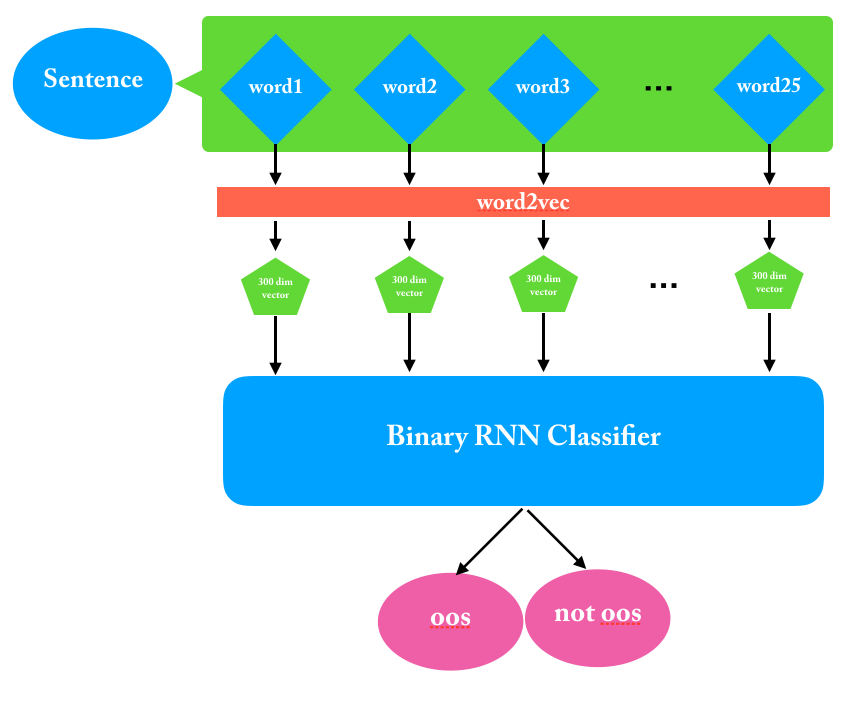

#### deviding the datasets into two groups of oos and none oos:

In [38]:
x_train_oos_rnn = x_train_10_rnn[y_train_10 == 'oos']
x_test_oos_rnn = x_test_10_rnn[y_test_10 == 'oos']
x_val_oos_rnn = x_val_10_rnn[y_val_10 == 'oos']

y_train_oos = np.ones(x_train_oos_rnn.shape[0])
y_test_oos = np.ones(x_test_oos_rnn.shape[0])
y_val_oos = np.ones(x_val_oos_rnn.shape[0])

In [39]:
x_train_9_rnn = x_train_10_rnn[y_train_10 != 'oos']
x_test_9_rnn = x_test_10_rnn[y_test_10 != 'oos']
x_val_9_rnn = x_val_10_rnn[y_val_10 != 'oos']

y_train_9 = np.zeros(x_train_9_rnn.shape[0])
y_test_9 = np.zeros(x_test_9_rnn.shape[0])
y_val_9 = np.zeros(x_val_9_rnn.shape[0])

In [40]:
x_train_binary_rnn = np.concatenate((x_train_oos_rnn, x_train_9_rnn), axis=0)
x_test_binary_rnn = np.concatenate((x_test_oos_rnn, x_test_9_rnn), axis=0)
x_val_binary_rnn = np.concatenate((x_val_oos_rnn, x_val_9_rnn), axis=0)

y_train_binary = np.concatenate((y_train_oos, y_train_9), axis=0)
y_test_binary = np.concatenate((y_test_oos, y_test_9), axis=0)
y_val_binary = np.concatenate((y_val_oos, y_val_9), axis=0)

In [41]:
#testng:
y_val_binary[123]

0.0

#### Testing LSTM22 model

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, TimeDistributed, Reshape

LSTM22Binary = Sequential()
LSTM22Binary.add(LSTM(600, input_shape=(25, 300), return_sequences=True))
LSTM22Binary.add(TimeDistributed(Dense(10, activation=LeakyReLU())))
LSTM22Binary.add(Dropout(rate=0.5))
LSTM22Binary.add(Reshape((250,)))
LSTM22Binary.add(Dense(1, activation='sigmoid'))
LSTM22Binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	
LSTM22Binary.summary()
LSTM22Binary.fit(x=x_train_binary_rnn,
          y=y_train_binary,
          validation_data=(x_val_binary_rnn, y_val_binary),
          epochs = 20,
          batch_size = 64,
          verbose = 0)
results = LSTM22Binary.evaluate(x_test_binary_rnn, y_test_binary, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 25, 600)           2162400   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 10)            6010      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 10)            0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 250)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 251       
Total params: 2,168,661
Trainable params: 2,168,661
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 11ms/step - loss: 1.5272 - accuracy: 0.8205
test accuracy:  82.0 

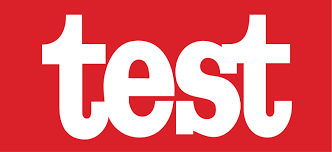

In [43]:
print('probability of being an OOS is:', int(LSTM22Binary.predict(sentence_to_25_vector('What are you goals?').reshape(1,25,300))[0,0]*10000)/100)


probability of being an OOS is: 99.99


###  a multiclass classification of 9 intents excluding oos **class**

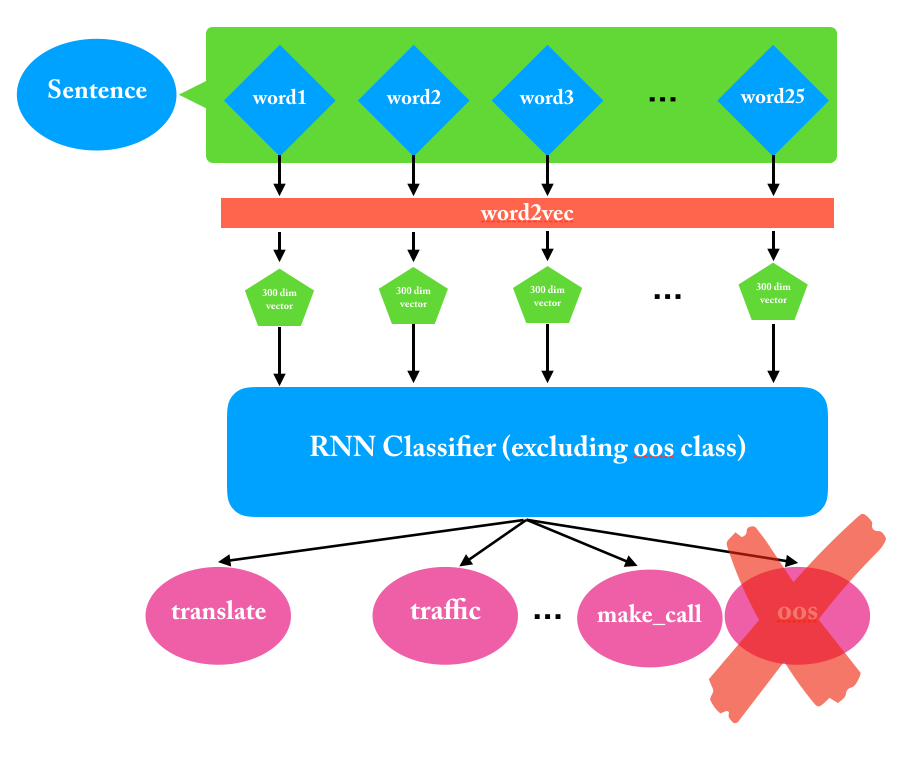

#### preparing the data:
#### removing oos class from the 10 classes defined before

In [45]:
x_train_9_rnn = x_train_10_rnn[y_train_10 != 'oos']
y_train_9_onehot = y_train_10_onehot[y_train_10 != 'oos']

x_test_9_rnn = x_test_10_rnn[y_test_10 != 'oos']
y_test_9_onehot = y_test_10_onehot[y_test_10 != 'oos']

x_val_9_rnn = x_val_10_rnn[y_val_10 != 'oos']
y_val_9_onehot = y_val_10_onehot[y_val_10 != 'oos']

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, TimeDistributed, Reshape

LSTM22REST = Sequential()
LSTM22REST.add(LSTM(600, input_shape=(25, 300), return_sequences=True))
LSTM22REST.add(TimeDistributed(Dense(10, activation=LeakyReLU())))
LSTM22REST.add(Dropout(rate=0.5))
LSTM22REST.add(Reshape((250,)))
LSTM22REST.add(Dense(10, activation='softmax'))
LSTM22REST.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LSTM22REST.summary()
LSTM22REST.fit(x=x_train_9_rnn,
          y=y_train_9_onehot,
          validation_data=(x_val_9_rnn, y_val_9_onehot),
          epochs=20,
          batch_size=64,
          verbose=0)
results = LSTM22REST.evaluate(x_test_9_rnn, y_test_9_onehot, verbose=1)
print('test accuracy: ', int(results[1]*1000)/10, '%')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 25, 600)           2162400   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 10)            6010      
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 10)            0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 250)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2510      
Total params: 2,170,920
Trainable params: 2,170,920
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 12ms/step - loss: 0.1221 - accuracy: 0.9741
test accuracy:  97.4 %


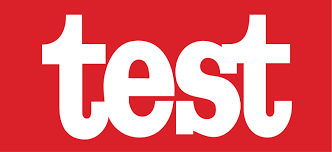

In [47]:
for i, val in enumerate((LSTM22REST.predict( sentence_to_25_vector('Text Bob I am going to be late').reshape(1,25,300))).tolist()[0]):
  print('intent-> {:22}'.format(labels[i]), '  probability: ', int(val*10000)/100)

intent-> translate                probability:  0.0
intent-> restaurant_reservation   probability:  0.0
intent-> restaurant_reviews       probability:  0.0
intent-> flight_status            probability:  0.0
intent-> play_music               probability:  0.0
intent-> make_call                probability:  0.0
intent-> current_location         probability:  0.0
intent-> text                     probability:  99.98
intent-> traffic                  probability:  0.0
intent-> oos                      probability:  0.0
